In [3]:
!pip install feature-engine
!pip install missingno
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from feature_engine.imputation import RandomSampleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import preprocessing
from numpy import random

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#train_data
df_train = pd.read_csv("https://github.com/hilaler/predict-the-processing-time-of-video-digital-conversion-process/blob/main/problem_1_train.csv?raw=true")

In [6]:
#test_data
df_test = pd.read_csv("https://github.com/hilaler/predict-the-processing-time-of-video-digital-conversion-process/blob/main/problem_1_test.csv?raw=true")

In [7]:
df = df_train.copy()
df.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,label
0,1,282.6,640.0,480.0,High Framerate,NaN,NaN,6920.0,7065.0,NaN,14806840.0,19773349.0,h264,NaN,360.0,Low Framerate,3000000.0,Fast
1,2,339.7,640.0,480.0,High Framerate,NaN,181.0,10010.0,10191.0,NaN,820261.0,NaN,NaN,1920.0,NaN,High Framerate,820000.0,Slow
2,3,239.1,480.0,360.0,High Framerate,500198.0,NaN,5868.0,NaN,1406751.0,13545526.0,14952277.0,h264,640.0,480.0,NaN,539000.0,Medium
3,4,714.4,1280.0,720.0,High Framerate,652356.0,143.0,NaN,NaN,14532530.0,43720516.0,58253046.0,vp8,1280.0,720.0,High Framerate,5000000.0,Slow
4,5,645.8,320.0,240.0,NaN,95903.0,138.0,16008.0,16146.0,NaN,6660941.0,7742262.0,vp8,320.0,240.0,High Framerate,56000.0,Fast


In [8]:
df_test.head()

,video,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate
0,48149,256.2,176.0,NaN,Low Framerate,57565.0,56.0,3018.0,NaN,302900.0,1540700.0,1843600.0,mpeg4,1920.0,NaN,High Framerate,NaN
1,48150,74.5,176.0,144.0,Low Framerate,NaN,15.0,879.0,NaN,NaN,491276.0,515272.0,mpeg4,176.0,144.0,High Framerate,820000.0
2,48151,NaN,NaN,144.0,Low Framerate,53707.0,37.0,2091.0,2128.0,100969.0,1089548.0,1190517.0,mpeg4,480.0,360.0,Low Framerate,3000000.0
3,48152,282.6,640.0,NaN,High Framerate,559834.0,145.0,6920.0,NaN,4966509.0,NaN,NaN,h264,1920.0,NaN,High Framerate,820000.0
4,48153,NaN,320.0,240.0,High Framerate,272273.0,23.0,1081.0,1104.0,NaN,1354404.0,NaN,NaN,480.0,360.0,High Framerate,539000.0


In [9]:
df.drop(columns=['video'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48148 entries, 0 to 48147
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          39458 non-null  float64
 1   width             39480 non-null  float64
 2   height            39560 non-null  float64
 3   frame_class       39454 non-null  object 
 4   bitrate           39415 non-null  float64
 5   intracoded_frame  39348 non-null  float64
 6   predicted_frame   39576 non-null  float64
 7   total_frame       39647 non-null  float64
 8   intracoded_size   39377 non-null  float64
 9   predicted_size    39602 non-null  float64
 10  total_size        39459 non-null  float64
 11  codec             39616 non-null  object 
 12  tc_width          39472 non-null  float64
 13  tc_height         39519 non-null  float64
 14  tc_frame_class    39457 non-null  object 
 15  tc_bitrate        39704 non-null  float64
 16  label             48148 non-null  object

In [10]:
df_test.drop(columns=['video'],inplace=True)

In [11]:
df.shape

(48148, 17)

In [12]:
nominal = ['frame_class','codec','tc_frame_class']
# nominal_lebih_dari_dua = ['Kode_Daerah','Kanal_Penjualan']
ordinal = []
numerik = ['duration','width', 'height', 'bitrate',	'intracoded_frame',	'predicted_frame',	'total_frame',	'intracoded_size',	'predicted_size',	'total_size','tc_width','tc_height','tc_bitrate']
label = 'label'

In [13]:
#jumlah value_counts()
for kolom in nominal+ordinal+['label']:
  print(df[kolom].value_counts(),'\n')

High Framerate    28700
Low Framerate     10754
Name: frame_class, dtype: int64 

h264     18154
vp8      10628
mpeg4     6860
flv       3974
Name: codec, dtype: int64 

High Framerate    23617
Low Framerate     15840
Name: tc_frame_class, dtype: int64 

Medium    24096
Fast      12138
Slow      11914
Name: label, dtype: int64 



In [14]:
#testing
contoh = df.dropna()
for kolom in nominal+ordinal+['label']:
  print(contoh[kolom].value_counts(),'\n')

High Framerate    1456
Low Framerate      534
Name: frame_class, dtype: int64 

h264     912
vp8      539
mpeg4    338
flv      201
Name: codec, dtype: int64 

High Framerate    1235
Low Framerate      755
Name: tc_frame_class, dtype: int64 

Medium    999
Fast      496
Slow      495
Name: label, dtype: int64 



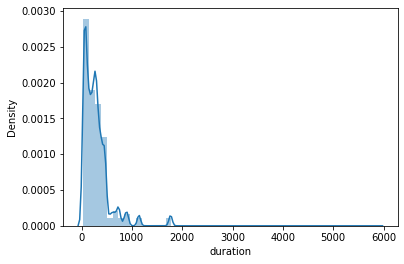

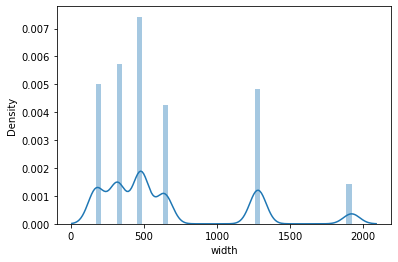

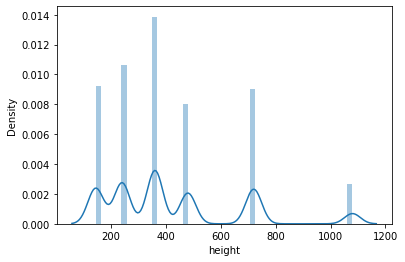

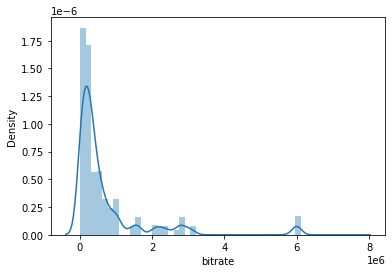

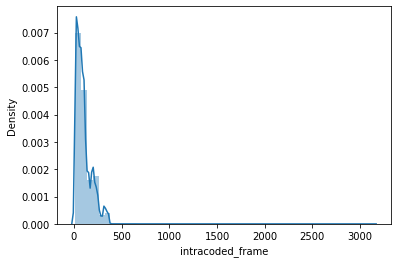

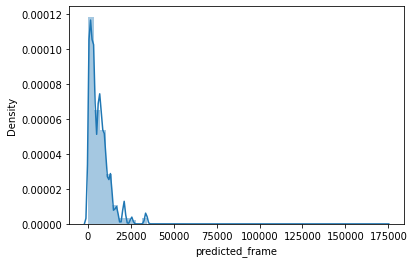

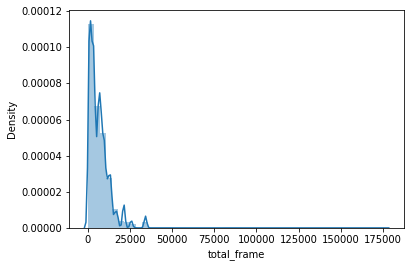

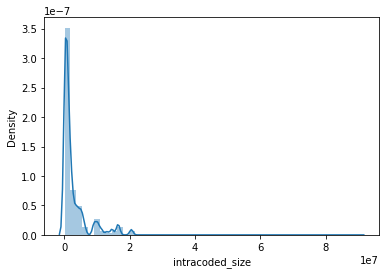

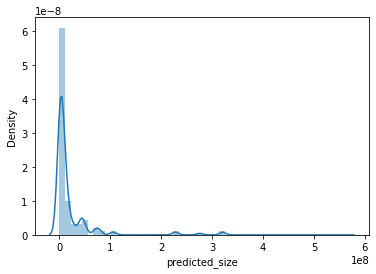

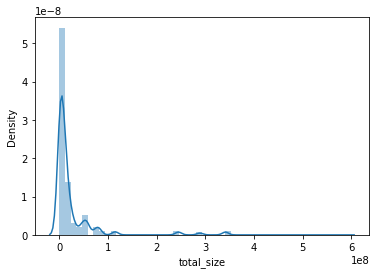

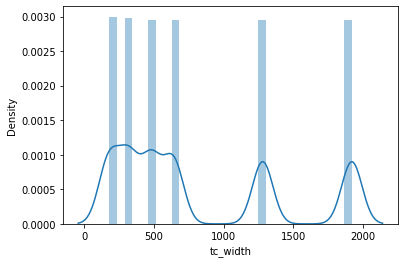

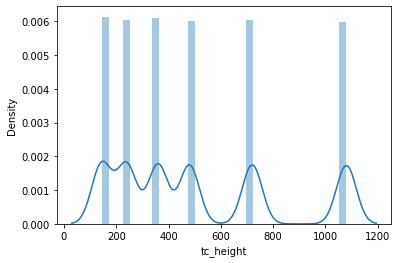

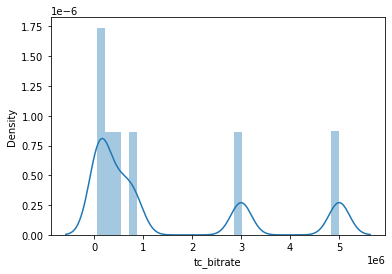

In [15]:
for kolom in numerik:
  plt.figure()
  sns.distplot(df[kolom])
plt.show()

# Null Value handling

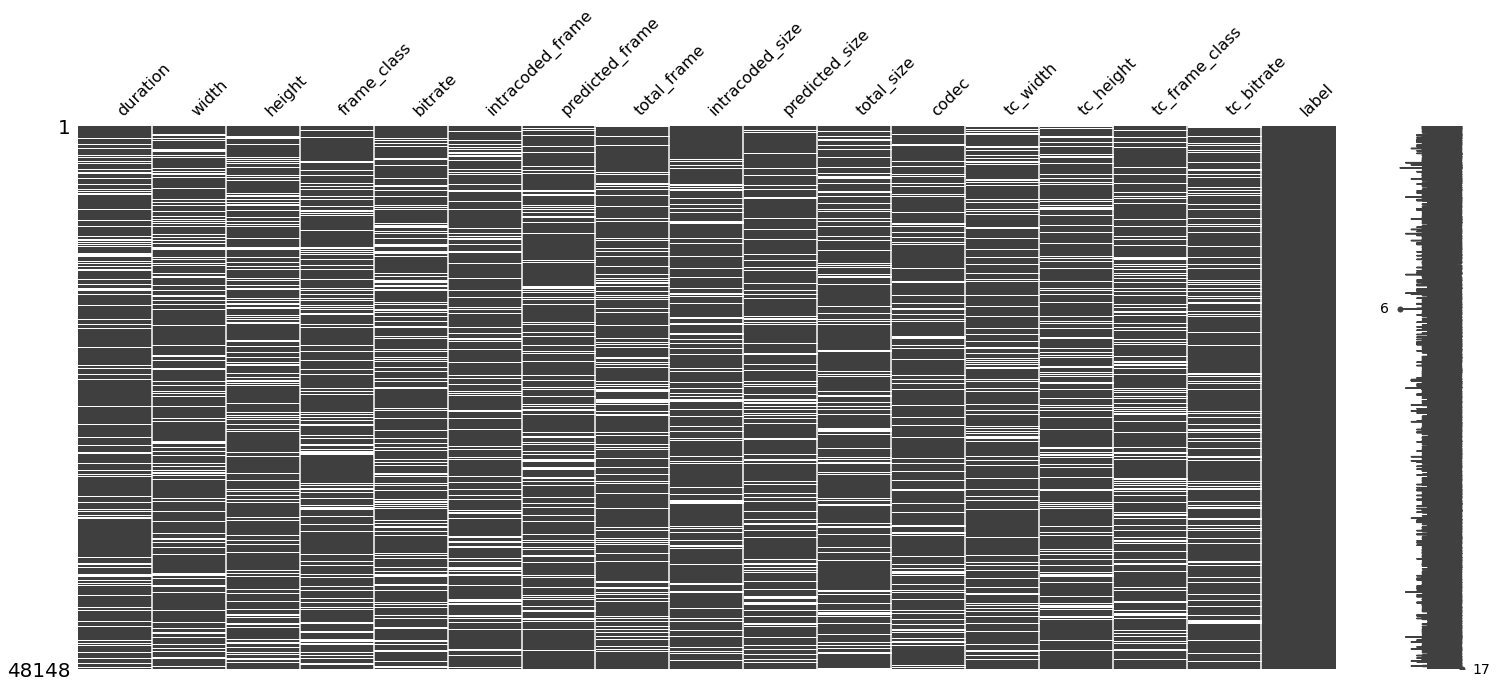

In [16]:
# Visualize misssing value
import missingno as msno
msno.matrix(df)

Missing Completely At Random 
(MCAR)

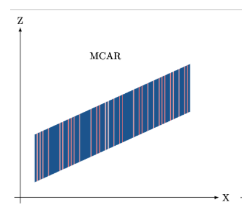

In [17]:
df.isna().sum()

duration            8690
width               8668
height              8588
frame_class         8694
bitrate             8733
intracoded_frame    8800
predicted_frame     8572
total_frame         8501
intracoded_size     8771
predicted_size      8546
total_size          8689
codec               8532
tc_width            8676
tc_height           8629
tc_frame_class      8691
tc_bitrate          8444
label                  0
dtype: int64

# missing value in numeric feature

In [18]:
df.corr()

,duration,width,height,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,tc_width,tc_height,tc_bitrate
duration,1.000000,0.076022,0.056806,0.002984,0.760803,0.850515,0.853524,0.446915,0.431998,0.445917,0.000667,0.000333,0.000702
width,0.076022,1.000000,0.990485,0.813720,0.071274,0.239128,0.240788,0.599967,0.556195,0.572180,-0.000570,-0.001364,0.006126
height,0.056806,0.990485,1.000000,0.798326,0.087944,0.238379,0.239214,0.594102,0.531761,0.547981,0.004586,0.003745,0.000594
bitrate,0.002984,0.813720,0.798326,1.000000,0.054006,0.108780,0.113108,0.443347,0.616195,0.613912,-0.000043,-0.000132,-0.000456
intracoded_frame,0.760803,0.071274,0.087944,0.054006,1.000000,0.828538,0.832318,0.543292,0.395021,0.421292,-0.000314,-0.000233,-0.004976
predicted_frame,0.850515,0.239128,0.238379,0.108780,0.828538,1.000000,0.999839,0.673371,0.608061,0.632759,0.003764,-0.000916,-0.004069
total_frame,0.853524,0.240788,0.239214,0.113108,0.832318,0.999839,1.000000,0.670335,0.607524,0.632724,0.004994,0.002787,-0.006565
intracoded_size,0.446915,0.599967,0.594102,0.443347,0.543292,0.673371,0.670335,1.000000,0.709717,0.748802,-0.003556,-0.006469,-0.003380
predicted_size,0.431998,0.556195,0.531761,0.616195,0.395021,0.608061,0.607524,0.709717,1.000000,0.998416,0.001871,-0.001974,-0.005507
total_size,0.445917,0.572180,0.547981,0.613912,0.421292,0.632759,0.632724,0.748802,0.998416,1.000000,0.002146,-0.001865,-0.005350


In [19]:
# function untuk mengatasi null menggunakan model
def missing_value_fixing(df, kolom_tujuan, feature1,feature2, model, metode_sisa_missing):
  observed = df[[kolom_tujuan,feature1,feature2]].dropna()

  model_imputasi = model
  model_imputasi.fit(observed.drop(columns=[kolom_tujuan]),observed[kolom_tujuan])

  result = model_imputasi.predict(df.loc[(df[kolom_tujuan].isnull()) & 
        (df[feature1].notnull()) & 
        (df[feature2].notnull())][[feature1,feature2]])

  index_null = df.loc[(df[kolom_tujuan].isnull()) & 
        (df[feature1].notnull()) & 
        (df[feature2].notnull())][kolom_tujuan].index
        
  for i,index_na in enumerate(index_null):
    df[kolom_tujuan][index_na] = result[i]
  
  if metode_sisa_missing=='mean':
    df[kolom_tujuan] = df[kolom_tujuan].fillna(df[kolom_tujuan].mean())
  elif metode_sisa_missing=='modus':
    df[kolom_tujuan] = df[kolom_tujuan].fillna(df[kolom_tujuan].mode()[0])
  
  return df

In [20]:
numerik

['duration',
 'width',
 'height',
 'bitrate',
 'intracoded_frame',
 'predicted_frame',
 'total_frame',
 'intracoded_size',
 'predicted_size',
 'total_size',
 'tc_width',
 'tc_height',
 'tc_bitrate']

In [21]:
df = missing_value_fixing(df,'duration','predicted_frame',	'total_frame',LinearRegression(),'mean')
df = missing_value_fixing(df,'width','height', 'bitrate',LinearRegression(),'mean')
df = missing_value_fixing(df,'height','width', 'bitrate',LinearRegression(),'mean')
df = missing_value_fixing(df,'bitrate','width', 'height',LinearRegression(),'mean')
df = missing_value_fixing(df,'intracoded_frame','predicted_frame', 'total_frame',LinearRegression(),'mean')
df = missing_value_fixing(df,'predicted_frame','intracoded_frame', 'total_frame',LinearRegression(),'mean')
df = missing_value_fixing(df,'total_frame','intracoded_frame', 'predicted_frame',LinearRegression(),'mean')

df = missing_value_fixing(df,'intracoded_size','predicted_size',	'total_size',LinearRegression(),'mean')
df = missing_value_fixing(df,'predicted_size','intracoded_size',	'total_size',LinearRegression(),'mean')
df = missing_value_fixing(df,'total_size','predicted_size',	'intracoded_size',LinearRegression(),'mean')
df = missing_value_fixing(df,'tc_height','tc_width','height',LinearRegression(),'mean')
df = missing_value_fixing(df,'tc_width','tc_height','width',LinearRegression(),'mean')

In [22]:
df_test = missing_value_fixing(df_test,'duration','predicted_frame',  'total_frame',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'width','height', 'bitrate',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'height','width', 'bitrate',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'bitrate','width', 'height',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'intracoded_frame','predicted_frame', 'total_frame',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'predicted_frame','intracoded_frame', 'total_frame',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'total_frame','intracoded_frame', 'predicted_frame',LinearRegression(),'mean')
 
df_test = missing_value_fixing(df_test,'intracoded_size','predicted_size',  'total_size',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'predicted_size','intracoded_size',  'total_size',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'total_size','predicted_size', 'intracoded_size',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'tc_height','tc_width','height',LinearRegression(),'mean')
df_test = missing_value_fixing(df_test,'tc_width','tc_height','width',LinearRegression(),'mean')

In [23]:
df['tc_bitrate'].value_counts()

56000.0      5721
5000000.0    5690
3000000.0    5679
242000.0     5671
109000.0     5656
539000.0     5651
820000.0     5636
Name: tc_bitrate, dtype: int64

In [24]:
random.choice([56000.0,3000000.0,109000.0,5000000.0,539000.0,820000.0])

3000000.0

In [25]:
df['tc_bitrate'].fillna(df['tc_bitrate'].mode(), inplace=True)
df_test['tc_bitrate'].fillna(df_test['tc_bitrate'].mode(), inplace=True)

In [26]:
# for i in range(len(df['tc_bitrate'])):
#   if np.isnan(df['tc_bitrate'][i]):
#     df['tc_bitrate'][i] = random.choice([56000,3000000,109000,5000000,539000,820000])

In [27]:
# # df_test['tc_bitrate'] = df_test['tc_bitrate'].fillna(random.choice([56000.0,3000000.0,109000.0,5000000.0,539000.0,820000.0]))
# from numpy import random
# for i in range(len(df_test['tc_bitrate'])):
#   if np.isnan(df_test['tc_bitrate'][i]):
#     df_test['tc_bitrate'][i] = random.choice([56000,3000000,109000,5000000,539000,820000])

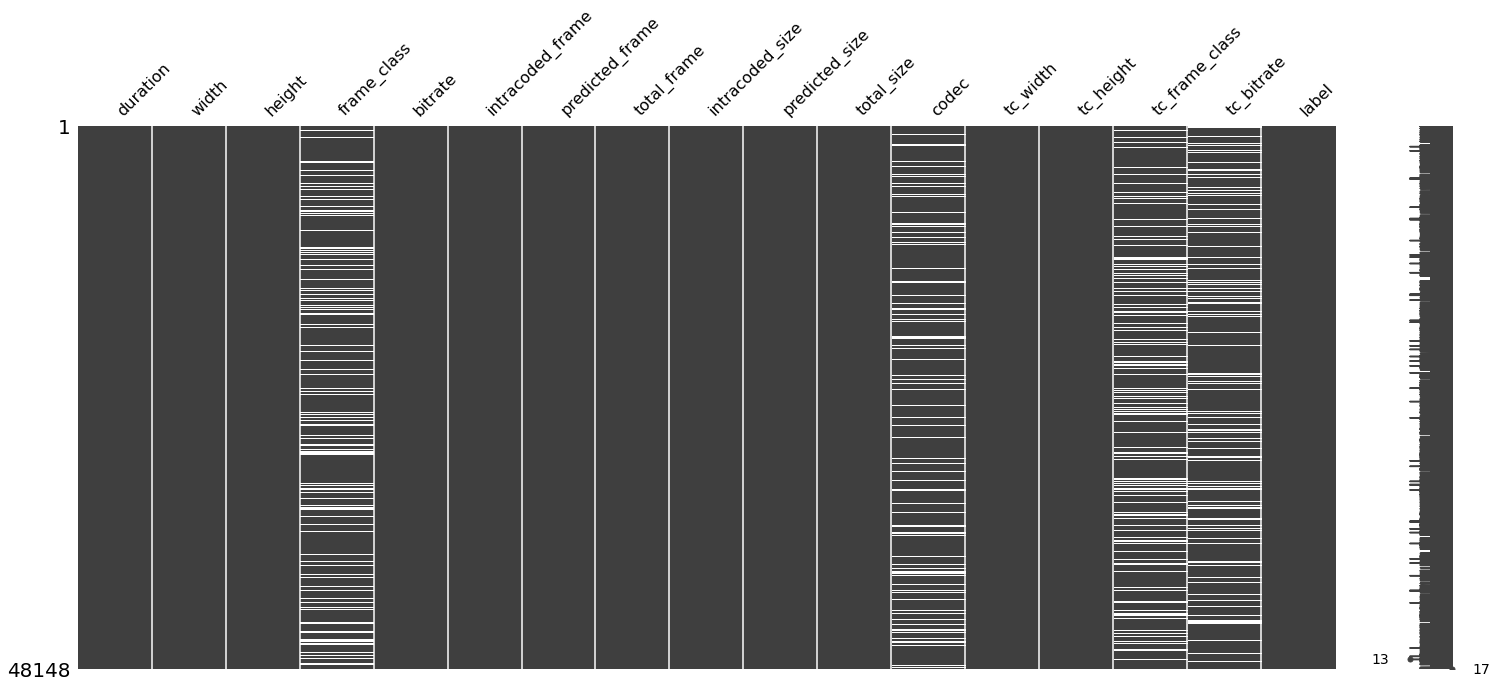

In [28]:
msno.matrix(df)

In [29]:
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]

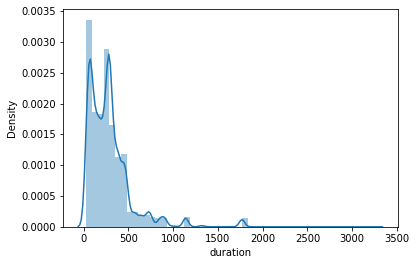

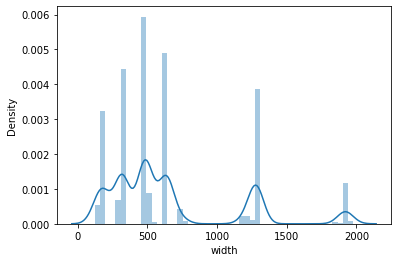

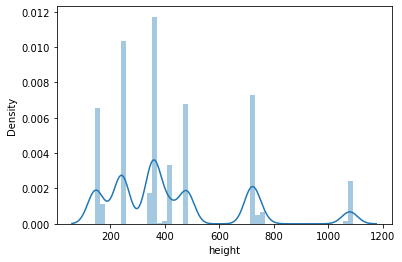

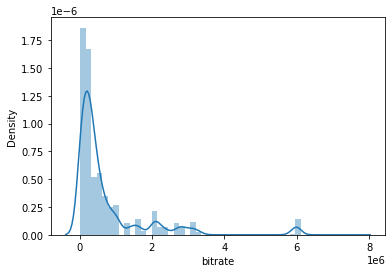

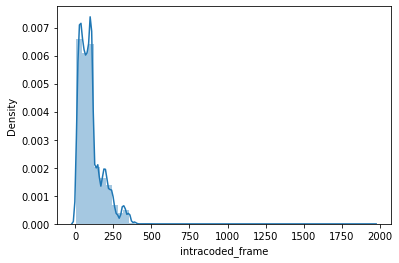

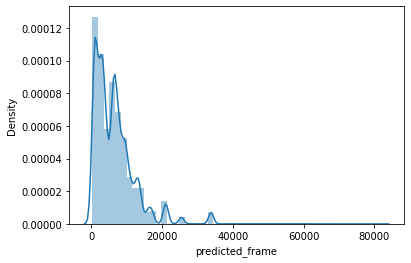

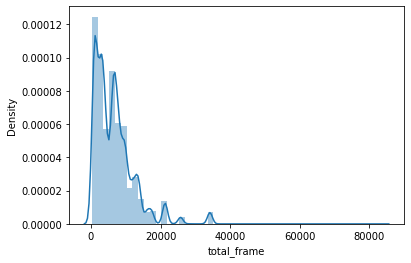

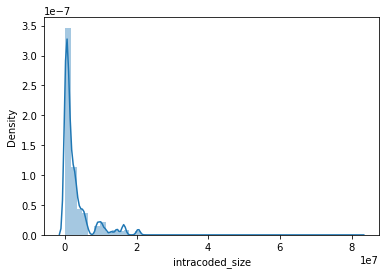

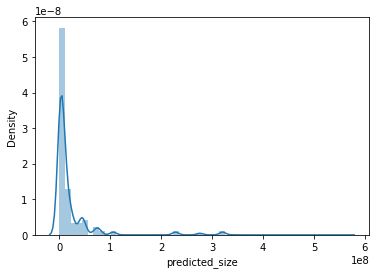

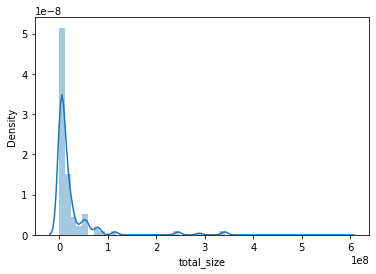

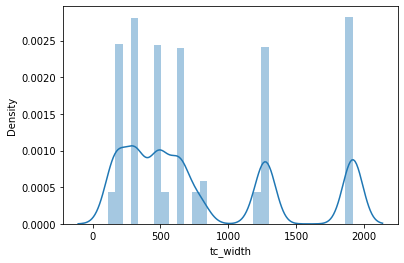

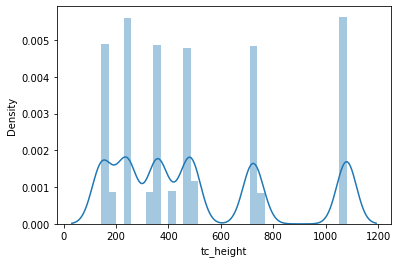

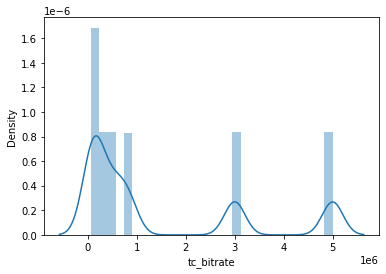

In [30]:
for kolom in numerik:
  plt.figure()
  sns.distplot(df[kolom])
plt.show()

# Missing value handling in categorical

In [31]:
df = df.reset_index()
df = df.drop(columns=['index'])

In [32]:
df_test = df_test.reset_index()
df_test = df_test.drop(columns=['index'])

In [33]:
# null in feature label
list_temp = []
for i in range(len(df['label'])):
  try:
    df['label'][i] = df['label'][i]
  except:
    list_temp.append(i)


In [34]:
list_temp

[]

In [35]:
# df.drop(list_temp)

In [36]:
df = df.replace({
    'High Framerate':0,
    'Low Framerate':1,
    'h264':0,
    'vp8':1,
    'mpeg4':2,
    'flv':3,
    'Medium':0,
    'Fast':1,
    'Slow':2
})
df.head()

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,label
0,282.6,640.0,480.0,0.0,484643.58764,112.048545,6920.000000,7065.000000,4.963097e+06,14806840.0,1.977335e+07,0.0,526.102499,360.000000,1.0,3000000.0,1
1,339.7,640.0,480.0,0.0,484643.58764,181.000000,10010.000000,10191.000000,2.837791e+06,820261.0,3.661565e+06,NaN,1920.000000,1079.551622,0.0,820000.0,2
2,239.1,480.0,360.0,0.0,500198.00000,100.649325,5868.000000,5980.220086,1.406751e+06,13545526.0,1.495228e+07,0.0,640.000000,480.000000,NaN,539000.0,0
3,714.4,1280.0,720.0,0.0,652356.00000,143.000000,6507.193859,6675.882193,1.453253e+07,43720516.0,5.825305e+07,1.0,1280.000000,720.000000,0.0,5000000.0,2
4,645.8,320.0,240.0,NaN,95903.00000,138.000000,16008.000000,16146.000000,1.077641e+06,6660941.0,7.742262e+06,1.0,320.000000,240.000000,0.0,56000.0,1


In [37]:
df_test = df_test.replace({
    'High Framerate':0,
    'Low Framerate':1,
    'h264':0,
    'vp8':1,
    'mpeg4':2,
    'flv':3,
    'Medium':0,
    'Fast':1,
    'Slow':2
})
df_test.head()

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate
0,256.200000,176.000000,178.83513,1.0,57565.000000,56.0,3018.0,3079.455472,3.029000e+05,1.540700e+06,1.843600e+06,2.0,1920.0,1079.458161,0.0,539000.0
1,74.500000,176.000000,144.00000,1.0,-4297.975807,15.0,879.0,891.028412,2.087387e+04,4.912760e+05,5.152720e+05,2.0,176.0,144.000000,0.0,820000.0
2,111.859249,122.888894,144.00000,1.0,53707.000000,37.0,2091.0,2128.000000,1.009690e+05,1.089548e+06,1.190517e+06,2.0,480.0,360.000000,1.0,3000000.0
3,282.600000,640.000000,421.68892,0.0,559834.000000,145.0,6920.0,7092.397212,4.966509e+06,2.279646e+07,2.776532e+07,0.0,1920.0,1079.454221,0.0,820000.0
4,72.870627,320.000000,240.00000,0.0,272273.000000,23.0,1081.0,1104.000000,2.854889e+06,1.354404e+06,4.212063e+06,NaN,480.0,360.000000,0.0,539000.0


In [38]:
for kolom in df.columns:
  if kolom not in numerik:
    print(df[kolom].value_counts(),'\n')

0.0    23286
1.0     7803
Name: frame_class, dtype: int64 

0.0    14835
1.0     8551
2.0     4735
3.0     3136
Name: codec, dtype: int64 

0.0    18575
1.0    12510
Name: tc_frame_class, dtype: int64 

0    19152
2     9504
1     9299
Name: label, dtype: int64 



In [39]:
nominal

['frame_class', 'codec', 'tc_frame_class']

In [40]:
feature = 'frame_class'
temp_df = df.dropna()
X = temp_df.drop(columns=[feature])
y = temp_df[feature]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print semua best features

               Specs         Score
9         total_size  9.228808e+10
8     predicted_size  8.010677e+10
7    intracoded_size  1.226000e+10
3            bitrate  2.375870e+09
6        total_frame  9.515443e+06
5    predicted_frame  9.408261e+06
14        tc_bitrate  3.138417e+06
1              width  1.143332e+06
2             height  5.826193e+05
4   intracoded_frame  8.051819e+04


In [41]:
df = missing_value_fixing(df,'frame_class','total_size','predicted_size',KNeighborsClassifier(21),'modus')

In [42]:
df_test = missing_value_fixing(df_test,'frame_class','total_size','predicted_size',KNeighborsClassifier(21),'modus')

In [43]:
feature = 'tc_frame_class'
temp_df = df.dropna()
X = temp_df.drop(columns=[feature])
y = temp_df[feature]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print semua best features

              Specs         Score
10       total_size  1.022871e+06
9    predicted_size  9.731055e+05
14       tc_bitrate  1.948757e+05
4           bitrate  5.652908e+04
8   intracoded_size  4.693150e+04
7       total_frame  8.271254e+02
6   predicted_frame  7.585915e+02
0          duration  3.337174e+02
12         tc_width  1.049445e+02
15            label  8.730281e+01


In [44]:
df = missing_value_fixing(df,'tc_frame_class','predicted_size','total_size',KNeighborsClassifier(21),'modus')

In [45]:
df_test = missing_value_fixing(df_test,'tc_frame_class','predicted_size','total_size',KNeighborsClassifier(21),'modus')

In [46]:
feature = 'codec'
temp_df = df.dropna()
X = temp_df.drop(columns=[feature])
y = temp_df[feature]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print semua best features

              Specs         Score
10       total_size  3.493390e+11
9    predicted_size  3.341361e+11
8   intracoded_size  2.367209e+10
4           bitrate  4.738821e+09
6   predicted_frame  2.135717e+07
7       total_frame  2.097211e+07
1             width  2.705649e+06
2            height  1.348952e+06
0          duration  5.558457e+05
14       tc_bitrate  3.608051e+05


In [47]:
df = missing_value_fixing(df,'codec','predicted_size','total_size',KNeighborsClassifier(21),'modus')

In [48]:
df_test = missing_value_fixing(df_test,'codec','predicted_size','total_size',KNeighborsClassifier(21),'modus')

In [49]:
df.isna().sum()

duration            0
width               0
height              0
frame_class         0
bitrate             0
intracoded_frame    0
predicted_frame     0
total_frame         0
intracoded_size     0
predicted_size      0
total_size          0
codec               0
tc_width            0
tc_height           0
tc_frame_class      0
tc_bitrate          0
label               0
dtype: int64

In [50]:
df_test.isna().sum()

duration               0
width                  0
height                 0
frame_class            0
bitrate                0
intracoded_frame       0
predicted_frame        0
total_frame            0
intracoded_size        0
predicted_size         0
total_size             0
codec                  0
tc_width               0
tc_height              0
tc_frame_class         0
tc_bitrate          4104
dtype: int64

In [51]:
df['label'][13]

2

# outlier

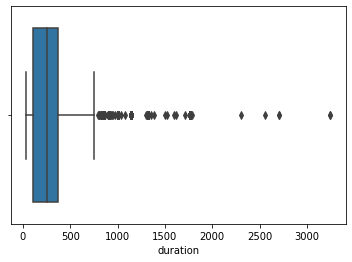

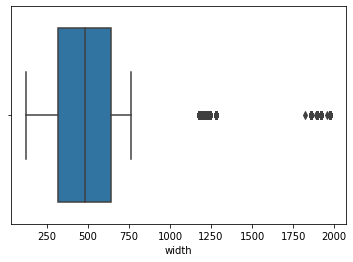

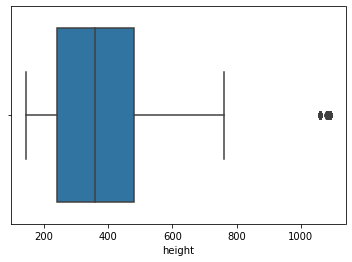

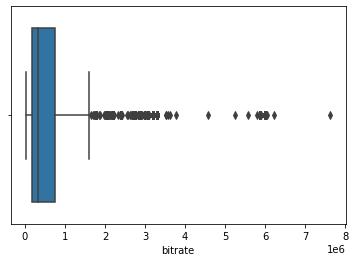

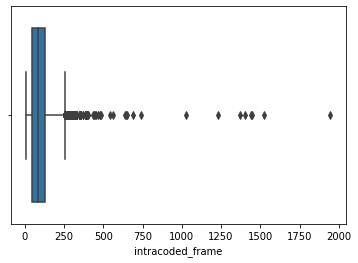

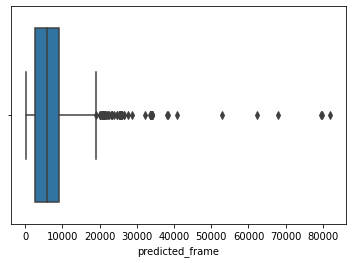

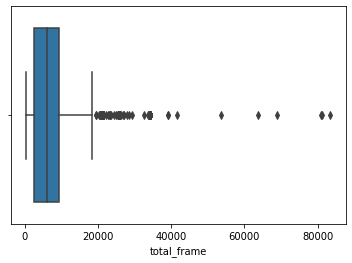

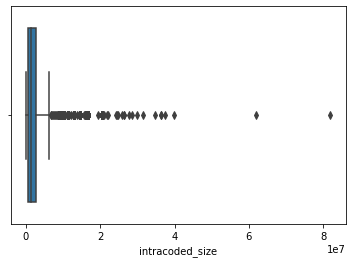

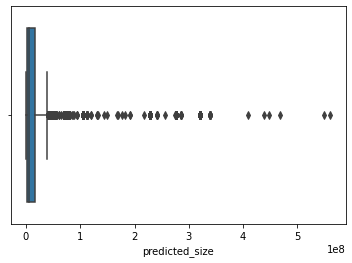

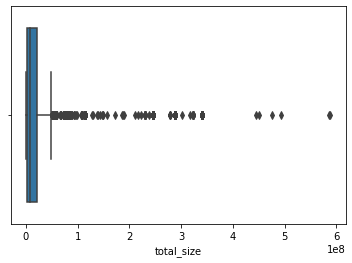

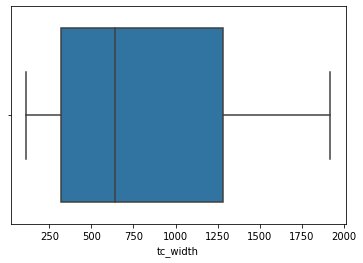

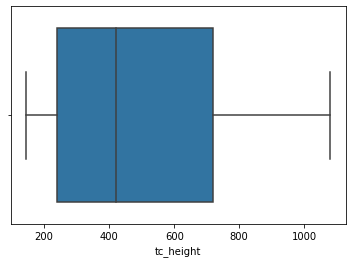

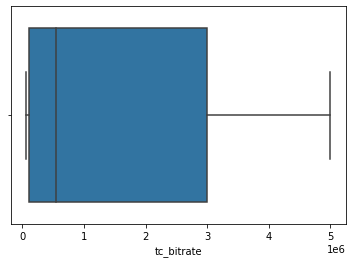

In [52]:
for kolom in numerik:
  plt.figure()
  sns.boxplot(df[kolom])
plt.show()

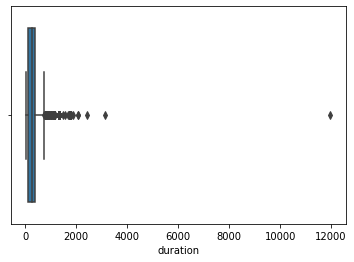

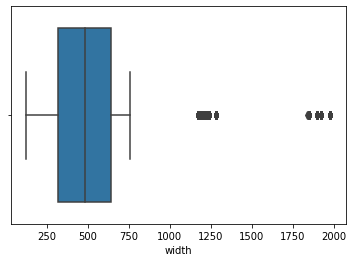

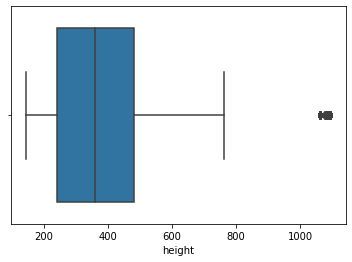

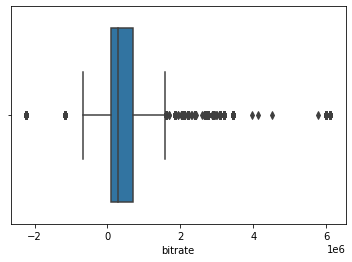

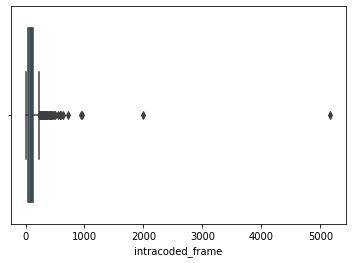

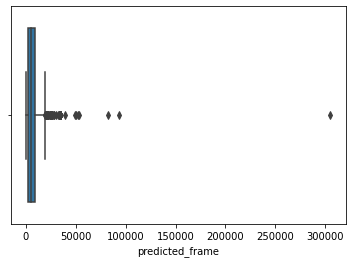

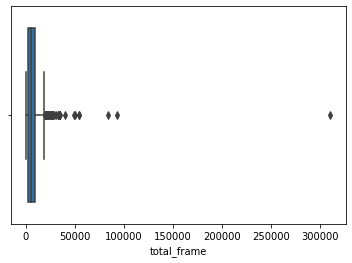

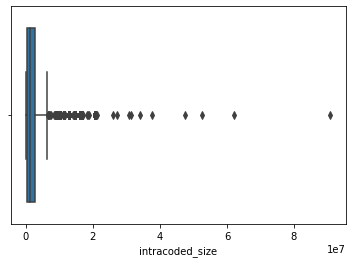

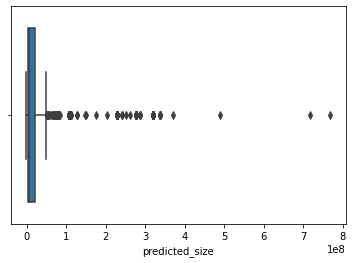

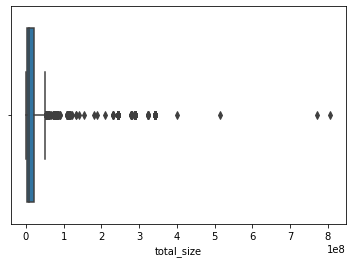

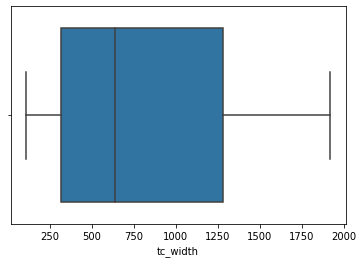

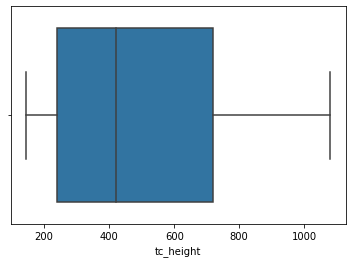

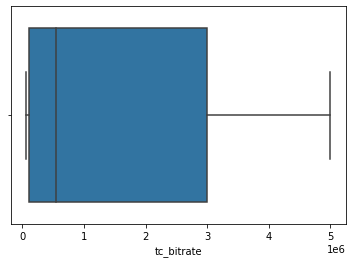

In [53]:
for kolom in numerik:
  plt.figure()
  sns.boxplot(df_test[kolom])
plt.show()

In [54]:
df

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate,label
0,282.600000,640.000000,480.000000,0.0,4.846436e+05,112.048545,6920.000000,7065.000000,4.963097e+06,1.480684e+07,1.977335e+07,0.0,526.102499,360.000000,1.0,3000000.0,1
1,339.700000,640.000000,480.000000,0.0,4.846436e+05,181.000000,10010.000000,10191.000000,2.837791e+06,8.202610e+05,3.661565e+06,2.0,1920.000000,1079.551622,0.0,820000.0,2
2,239.100000,480.000000,360.000000,0.0,5.001980e+05,100.649325,5868.000000,5980.220086,1.406751e+06,1.354553e+07,1.495228e+07,0.0,640.000000,480.000000,1.0,539000.0,0
3,714.400000,1280.000000,720.000000,0.0,6.523560e+05,143.000000,6507.193859,6675.882193,1.453253e+07,4.372052e+07,5.825305e+07,1.0,1280.000000,720.000000,0.0,5000000.0,2
4,645.800000,320.000000,240.000000,0.0,9.590300e+04,138.000000,16008.000000,16146.000000,1.077641e+06,6.660941e+06,7.742262e+06,1.0,320.000000,240.000000,0.0,56000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37950,77.200000,480.000000,360.000000,0.0,3.824610e+05,53.000000,2265.000000,2318.000000,1.822970e+05,3.510033e+06,3.692330e+06,0.0,176.000000,144.000000,0.0,539000.0,0
37951,384.500000,746.104755,480.000000,0.0,6.464320e+05,205.000000,11318.000000,11523.000000,2.839955e+06,2.822192e+07,3.106520e+07,0.0,110.710454,144.000000,1.0,5000000.0,1
37952,1321.485538,1280.000000,720.000000,0.0,2.394626e+06,328.000000,33880.000000,34208.000000,2.047893e+07,3.208599e+08,3.413388e+08,1.0,320.000000,240.000000,1.0,56000.0,0
37953,473.000000,625.350523,413.148173,0.0,6.933816e+05,100.649325,11730.988873,11826.000000,1.419320e+06,8.047423e+06,9.697521e+06,0.0,1280.000000,720.000000,0.0,5000000.0,0


In [55]:
feature = 'label'
temp_df = df.dropna()
X = temp_df.drop(columns=[feature])
y = temp_df[feature]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print semua best features

              Specs         Score
10       total_size  2.045468e+11
9    predicted_size  1.995165e+11
8   intracoded_size  9.220881e+09
4           bitrate  6.220043e+09
15       tc_bitrate  5.705563e+08
12         tc_width  8.887663e+06
13        tc_height  3.792773e+06
7       total_frame  2.672863e+06
6   predicted_frame  2.667675e+06
1             width  1.352587e+06


In [56]:
x = df.drop(columns=['label'])
y = df['label']
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

temp = pd.DataFrame(x,columns=nominal+numerik)
temp['label'] = y
temp = temp.reset_index()
temp = temp.drop(columns=['index'])
temp.to_csv('/content/drive/MyDrive/dana_assignment/train.csv',index=False)

In [57]:
df.drop(columns=['label'])

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate
0,282.600000,640.000000,480.000000,0.0,4.846436e+05,112.048545,6920.000000,7065.000000,4.963097e+06,1.480684e+07,1.977335e+07,0.0,526.102499,360.000000,1.0,3000000.0
1,339.700000,640.000000,480.000000,0.0,4.846436e+05,181.000000,10010.000000,10191.000000,2.837791e+06,8.202610e+05,3.661565e+06,2.0,1920.000000,1079.551622,0.0,820000.0
2,239.100000,480.000000,360.000000,0.0,5.001980e+05,100.649325,5868.000000,5980.220086,1.406751e+06,1.354553e+07,1.495228e+07,0.0,640.000000,480.000000,1.0,539000.0
3,714.400000,1280.000000,720.000000,0.0,6.523560e+05,143.000000,6507.193859,6675.882193,1.453253e+07,4.372052e+07,5.825305e+07,1.0,1280.000000,720.000000,0.0,5000000.0
4,645.800000,320.000000,240.000000,0.0,9.590300e+04,138.000000,16008.000000,16146.000000,1.077641e+06,6.660941e+06,7.742262e+06,1.0,320.000000,240.000000,0.0,56000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37950,77.200000,480.000000,360.000000,0.0,3.824610e+05,53.000000,2265.000000,2318.000000,1.822970e+05,3.510033e+06,3.692330e+06,0.0,176.000000,144.000000,0.0,539000.0
37951,384.500000,746.104755,480.000000,0.0,6.464320e+05,205.000000,11318.000000,11523.000000,2.839955e+06,2.822192e+07,3.106520e+07,0.0,110.710454,144.000000,1.0,5000000.0
37952,1321.485538,1280.000000,720.000000,0.0,2.394626e+06,328.000000,33880.000000,34208.000000,2.047893e+07,3.208599e+08,3.413388e+08,1.0,320.000000,240.000000,1.0,56000.0
37953,473.000000,625.350523,413.148173,0.0,6.933816e+05,100.649325,11730.988873,11826.000000,1.419320e+06,8.047423e+06,9.697521e+06,0.0,1280.000000,720.000000,0.0,5000000.0


In [58]:
df_test

,duration,width,height,frame_class,bitrate,intracoded_frame,predicted_frame,total_frame,intracoded_size,predicted_size,total_size,codec,tc_width,tc_height,tc_frame_class,tc_bitrate
0,256.200000,176.000000,178.835130,1.0,5.756500e+04,56.0,3018.0,3079.455472,3.029000e+05,1.540700e+06,1.843600e+06,2.0,1920.000000,1079.458161,0.0,539000.0
1,74.500000,176.000000,144.000000,1.0,-4.297976e+03,15.0,879.0,891.028412,2.087387e+04,4.912760e+05,5.152720e+05,2.0,176.000000,144.000000,0.0,820000.0
2,111.859249,122.888894,144.000000,1.0,5.370700e+04,37.0,2091.0,2128.000000,1.009690e+05,1.089548e+06,1.190517e+06,2.0,480.000000,360.000000,1.0,3000000.0
3,282.600000,640.000000,421.688920,0.0,5.598340e+05,145.0,6920.0,7092.397212,4.966509e+06,2.279646e+07,2.776532e+07,0.0,1920.000000,1079.454221,0.0,820000.0
4,72.870627,320.000000,240.000000,0.0,2.722730e+05,23.0,1081.0,1104.000000,2.854889e+06,1.354404e+06,4.212063e+06,1.0,480.000000,360.000000,0.0,539000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20631,860.100000,1280.000000,745.832811,0.0,2.688309e+06,277.0,25496.0,25773.000000,1.298983e+07,2.760223e+08,2.890121e+08,1.0,320.000000,240.000000,1.0,539000.0
20632,106.800000,1280.000000,720.000000,0.0,2.087216e+06,66.0,2603.0,2669.000000,4.427240e+06,6.911026e+06,1.133827e+07,0.0,176.000000,144.000000,0.0,5000000.0
20633,157.900000,480.000000,360.000000,0.0,4.069080e+05,87.0,4646.0,4733.000000,1.776729e+06,6.254165e+06,8.030894e+06,0.0,524.746764,360.000000,0.0,NaN
20634,311.100000,176.000000,144.000000,1.0,5.641600e+04,113.0,3620.0,3733.000000,1.275520e+05,2.066350e+06,2.197078e+06,2.0,108.755419,144.000000,0.0,539000.0


In [59]:
df_test = scaler.transform(df_test)

temp = pd.DataFrame(df_test,columns=nominal+numerik)
temp = temp.reset_index()
temp = temp.drop(columns=['index'])

temp.to_csv('/content/drive/MyDrive/dana_assignment/test.csv',index=False)